In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import files
uploades = files.upload()
data = pd.read_csv('NYC_Parks_Monuments.csv')#Retrive data 

Saving NYC_Parks_Monuments.csv to NYC_Parks_Monuments.csv


In [3]:
data.head() #check out the first five columns of the data

,name,fileorder,number,parkprop,borough,parkname,parknumber,commboard,council,Location,...,Name2,Name3,MaintainedByParks,Installation,Rededication,Cost,Categories,inscribed,X,Y
0,"quinn, matthew d.",NaN,1308,N,Queens,NaN,NaN,0.0,0.0,LONG ISLAND CITY; academy st. near grand Avenue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Conway, Frank Tablet",NaN,327,N,the Bronx,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cigarette,Cigarette,1937,N,Manhattan,NaN,NaN,5.0,3.0,"The Museum of Modern Art, 11 West 53rd Street",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Philosophy,NaN,1181,O,Manhattan,Bryant Park,M008,5.0,3.0,New York Public Library; 42nd St. and 5th Avenue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Giuseppe Garibaldi,"Garibaldi, Giuseppe",571,Y,Manhattan,Washington Square Park,M098,2.0,1.0,NaN,...,NaN,NaN,Y,NaN,NaN,NaN,Politcal Figure,NaN,985120.016293,205443.463835


In [4]:
data = data.dropna(axis='columns', how='all') #This function will remove columns that contain all NaN values (because all nulls hence there will be no useful information)

#Next I will remove columns that do not contain useful information
data_cleaned = data[['name','parkprop','parknumber','commboard','council','dimen','extant','Cost']] #We will select these columns because they seem to contain useful information
data_cleaned
data_cleaned.to_csv('data_cleaned.csv', index=False) #This will convert the dataframe into a csv file

In [5]:
Commboard_analysis = data_cleaned.groupby(['commboard']).size() #We will groupby each commboard and see how many monuments are in each
Commboard_analysis = pd.DataFrame(Commboard_analysis).reset_index() #Becasue we want a graph that has the index on the y axis this will make plotting easier
Commboard_analysis = Commboard_analysis[:-1] #The last commboard has too large of index and will affect the graph too much and it only has a count of one too so we can simply remove it

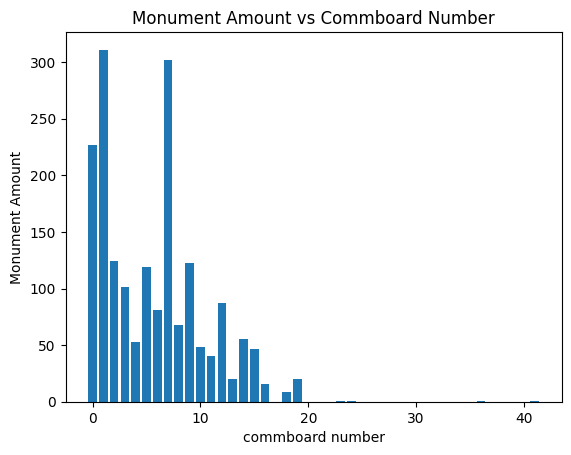

In [6]:
plt.bar(Commboard_analysis['commboard'], Commboard_analysis[0]) #We can use this barchart to visualize and see which commboard has the most monuments
plt.xlabel('commboard number') #xlabel name
plt.ylabel('Monument Amount') #ylabel name
plt.title('Monument Amount vs Commboard Number')
plt.savefig('plot1.png')

In [7]:
print('As we can see from the graph that commboard 1 and commboard 7 have the most monuments')

As we can see from the graph that commboard 1 and commboard 7 have the most monuments


In [8]:
data_cleaned.head()

,name,parkprop,parknumber,commboard,council,dimen,extant,Cost
0,"quinn, matthew d.",N,NaN,0.0,0.0,NaN,Y,NaN
1,"Conway, Frank Tablet",N,NaN,0.0,0.0,NaN,M,NaN
2,Cigarette,N,NaN,5.0,3.0,"h 15'1"" x w 25'6"" x d 18'7""",Y,NaN
3,Philosophy,O,M008,5.0,3.0,NaN,Y,NaN
4,Giuseppe Garibaldi,Y,M098,2.0,1.0,"H: 20'8"" W: 10' D: 10'",Y,NaN


In [9]:
council_analysis = data_cleaned.groupby(['council']).size() #We will groupby each council and see how many monuments are in each
council_analysis = pd.DataFrame(council_analysis).reset_index() 
council_analysis

,council,0
0,0.0,121
1,1.0,248
2,2.0,76
3,3.0,94
4,4.0,35
5,5.0,28
6,6.0,253
7,7.0,84
8,8.0,14
9,9.0,55


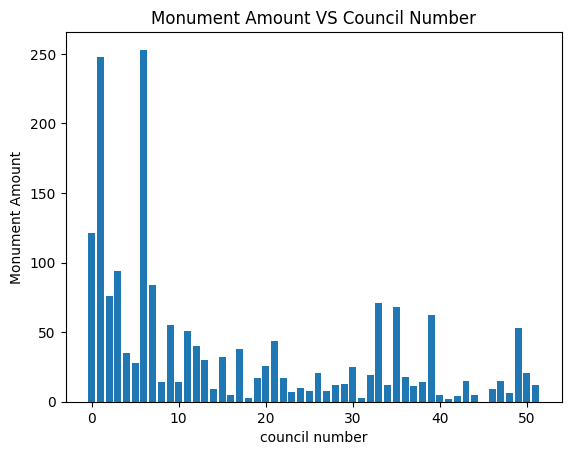

In [10]:
plt.bar(council_analysis['council'], council_analysis[0]) #We can use this barchart to visualize and see which commboard has the most monuments
plt.xlabel('council number')
plt.ylabel('Monument Amount')
plt.title('Monument Amount VS Council Number')
plt.savefig('plot2.png')

In [11]:
print('as we can see from the plot that council number 1 and council number 6 have the most monuments out of all councils')

as we can see from the plot that council number 1 and council number 6 have the most monuments out of all councils


In [12]:
import re
dimen = data_cleaned['dimen']
dimen_cleaned = dimen.dropna() #drop any na values from the column
def get_Height(x): #This function will give us the height of each monument 
    return re.findall(r'\d+', x)[:2]
dim = dimen_cleaned.apply(get_Height)


In [13]:
def convert_Height(l): #This function will convert height into meters
    if len(l) == 1:
        return float(l[0])*0.3048
    if len(l) == 2:        
        return float(l[0])*0.3048 + float(l[1])*0.0254
    else:
        return 0
    
dim_M = dim.apply(convert_Height)
dim_M = dim_M[dim_M != 0]


Mean_H = np.mean(dim_M)
std_H = np.std(dim_M)

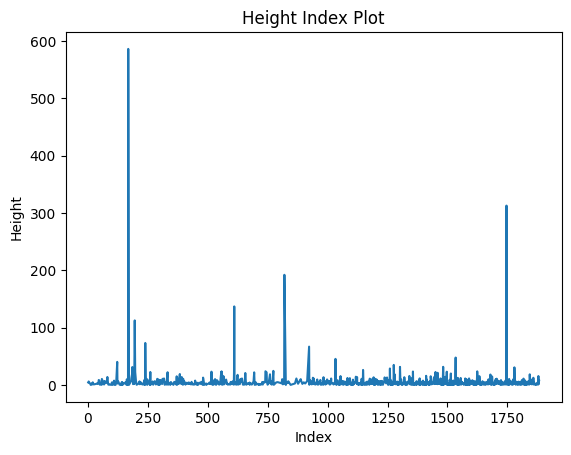

In [14]:
plt.plot(dim_M)
plt.xlabel('Index')
plt.ylabel('Height')
plt.title('Height Index Plot')
plt.savefig('plot3.png')

In [15]:
print('As we can see from the graph most monuments are under 100 meters while there are a few that are higher than 100 meters causing large standard deviation')

As we can see from the graph most monuments are under 100 meters while there are a few that are higher than 100 meters causing large standard deviation


In [16]:
# The mean height for monument is 
Mean_H

5.691083211678832

In [17]:
#The standard deviation of height for monument is 
std_H

22.07306176885171

#Reference
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
https://stackoverflow.com/questions/4289331/how-to-extract-numbers-from-a-string-in-python